In [1]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from environments.discrete_env_v1 import PortfolioManagementEnv

In [3]:
df = pd.read_csv('data/dow_10_returns.csv', index_col=0, parse_dates=True)
df['FEATURE_1'] = 0.1
df['FEATURE_2'] = 0.2
df['FEATURE_3'] = 0.3
df.head()

,RF_RETURN,AXP_RETURN,AAPL_RETURN,BA_RETURN,GS_RETURN,INTC_RETURN,JNJ_RETURN,KO_RETURN,NKE_RETURN,PG_RETURN,DIS_RETURN,FEATURE_1,FEATURE_2,FEATURE_3
2010-01-04,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.2,0.3
2010-01-05,0.000146,-0.002199,0.001729,0.032752,0.017680,-0.000479,-0.011595,-0.012097,0.003979,0.000327,-0.002494,0.1,0.2,0.3
2010-01-06,0.000148,0.016165,-0.015906,0.030334,-0.010674,-0.003354,0.008133,-0.000355,-0.006097,-0.004743,-0.005314,0.1,0.2,0.3
2010-01-07,0.000149,0.016219,-0.001849,0.040482,0.019568,-0.009615,-0.007137,-0.002485,0.009815,-0.005423,0.000314,0.1,0.2,0.3
2010-01-08,0.000148,-0.000715,0.006649,-0.009646,-0.018911,0.011165,0.003439,-0.018509,-0.001975,-0.001322,0.001571,0.1,0.2,0.3


In [4]:
TICKERS = ['AXP', 'AAPL', 'BA', 'GS', 'INTC', 'JNJ', 'KO', 'NKE', 'PG', 'DIS']

RETURN_COLS = ['RF_RETURN'] + [f'{ticker}_RETURN' for ticker in TICKERS]

FEATURE_COLS = ['FEATURE_1', 'FEATURE_2', 'FEATURE_3']

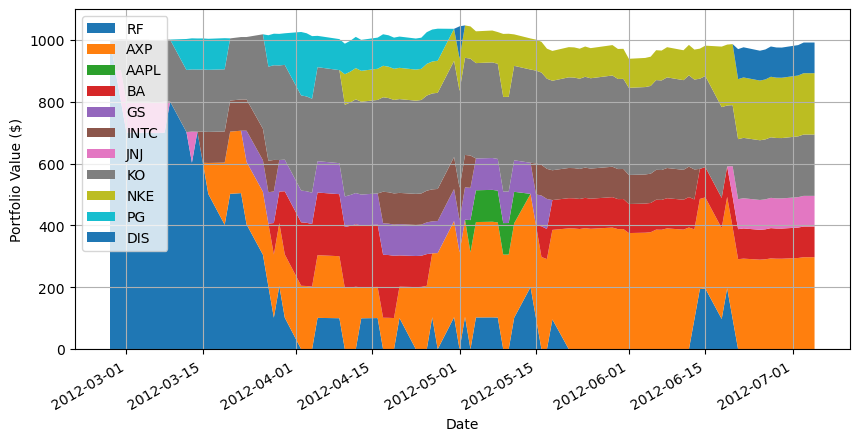

In [5]:
# train mode
np.random.seed(10)
env = PortfolioManagementEnv(df, RETURN_COLS, FEATURE_COLS, episode_length=90, window_size=14)

obs, done = env.reset(), False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)

env.render()
env.close()

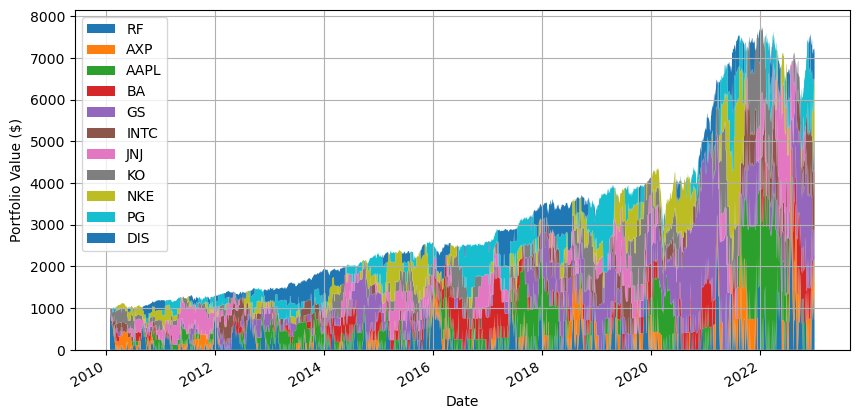

In [6]:
# test mode
np.random.seed(10)
env = PortfolioManagementEnv(df, RETURN_COLS, FEATURE_COLS, episode_length=-1, window_size=14)

obs, done = env.reset(), False
while not done:
    action = np.random.randint(env.action_space.n)
    obs, reward, done, info = env.step(action)

env.render()
env.close()

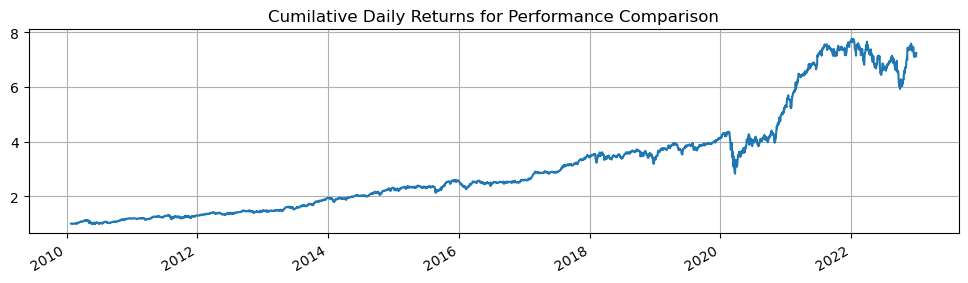

In [7]:
(1+env.get_portfolio_returns()).cumprod().plot(title='Cumilative Daily Returns for Performance Comparison', figsize=(12,3), grid=True);